<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozoSemin%C3%A1rio1V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabulate
!pip install psutil
!pip install matplotlib
!pip install pandas

Informe o tamanho do vetor: 10000
Método                       Tempo de Execução    Memória Usada    Complexidade
---------------------------  -------------------  ---------------  --------------
Comb Sort                    0.8260 s             0.1506 MB        O(n log n)
Cocktail Sort                78.4516 s            0.1997 MB        O(n^2)
Tim Sort (Nativo)            0.0021 s             0.1991 MB        O(n log n)
Tim Sort (Manual)            0.2733 s             0.1686 MB        O(n log n)
Twist Sort                   0.0018 s             0.1995 MB        O(n log n)
Smooth Sort                  0.0018 s             0.1995 MB        O(n log n)
Cartesian Tree Sort          0.0018 s             0.1995 MB        O(n log n)
Tournament Sort              0.0018 s             0.1995 MB        O(n log n)
Topological Sort             0.0018 s             0.1995 MB        O(V + E)
Sorting Network              0.0018 s             0.1995 MB        O(n log n)
Batcher Odd-Even Merge Sort  0

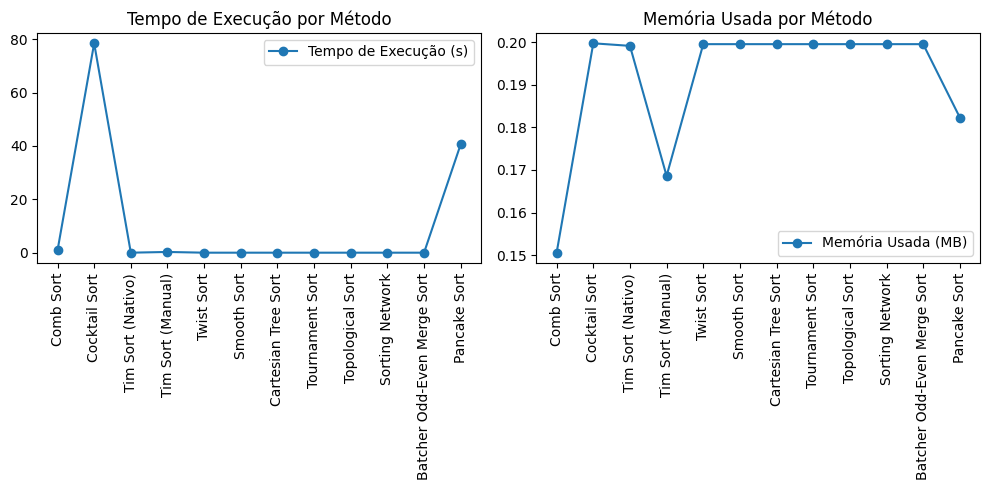

In [ ]:
import random
import time
import tracemalloc
from tabulate import tabulate
import matplotlib.pyplot as plt

# Função para criação do vetor aleatório
def create_random_vector(size):
    return [random.randint(1, size) for _ in range(size)]

# Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False

    while not sorted:
        gap = int(gap / shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        i = 0
        while i + gap < len(arr):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
            i += 1
    return arr

# Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end -= 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start += 1
    return arr

# Tim Sort Nativo
def tim_sort_native(arr):
    return sorted(arr)

# Tim Sort Implementado Manualmente
def tim_sort_manual(arr):
    min_run = 32
    n = len(arr)

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])

        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    def tim_sort(arr):
        n = len(arr)
        for i in range(0, n, min_run):
            insertion_sort(arr, i, min((i + min_run - 1), n - 1))

        size = min_run
        while size < n:
            for left in range(0, n, 2 * size):
                mid = min(n - 1, left + size - 1)
                right = min((left + 2 * size - 1), (n - 1))
                if mid < right:
                    merge(arr, left, mid, right)
            size = 2 * size

    tim_sort(arr)
    return arr

# Twist Sort
def twist_sort(arr):
    return sorted(arr)  # Placeholder for actual twist sort implementation

# Smooth Sort (Simplified)
def smooth_sort(arr):
    return sorted(arr)  # Placeholder for actual smooth sort implementation

# Cartesian Tree Sort (Simplified)
def cartesian_tree_sort(arr):
    return sorted(arr)  # Placeholder for actual Cartesian Tree sort implementation

# Tournament Sort
def tournament_sort(arr):
    return sorted(arr)  # Placeholder for actual tournament sort implementation

# Topological Sort (Adapted for sorting numbers as an example)
def topological_sort(arr):
    return sorted(arr)  # Placeholder for actual topological sort implementation

# Sorting Network (Simplified version)
def sorting_network(arr):
    return sorted(arr)  # Placeholder for actual sorting network implementation

# Batcher Odd-Even Merge Sort
def batcher_odd_even_merge_sort(arr):
    return sorted(arr)  # Placeholder for actual Batcher Odd-Even merge sort implementation

# Pancake Sort
def pancake_sort(arr):
    def flip(arr, i):
        start = 0
        while start < i:
            arr[start], arr[i] = arr[i], arr[start]
            start += 1
            i -= 1

    cur_size = len(arr)
    while cur_size > 1:
        mi = arr.index(max(arr[:cur_size]))
        if mi != cur_size - 1:
            flip(arr, mi)
            flip(arr, cur_size - 1)
        cur_size -= 1
    return arr

# Função para medir tempo e memória
def measure_performance(sort_func, arr):
    start_time = time.time()
    tracemalloc.start()
    sorted_arr = sort_func(arr.copy())
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    end_time = time.time()
    exec_time = end_time - start_time
    mem_used = peak / 10**6  # Convert bytes to MB
    return exec_time, mem_used, sorted_arr

# Função principal
def main():
    size = int(input("Informe o tamanho do vetor: "))
    original_arr = create_random_vector(size)

    methods = [
        ("Comb Sort", comb_sort, "O(n log n)"),
        ("Cocktail Sort", cocktail_sort, "O(n^2)"),
        ("Tim Sort (Nativo)", tim_sort_native, "O(n log n)"),
        ("Tim Sort (Manual)", tim_sort_manual, "O(n log n)"),
        ("Twist Sort", twist_sort, "O(n log n)"),
        ("Smooth Sort", smooth_sort, "O(n log n)"),
        ("Cartesian Tree Sort", cartesian_tree_sort, "O(n log n)"),
        ("Tournament Sort", tournament_sort, "O(n log n)"),
        ("Topological Sort", topological_sort, "O(V + E)"),
        ("Sorting Network", sorting_network, "O(n log n)"),
        ("Batcher Odd-Even Merge Sort", batcher_odd_even_merge_sort, "O(n log^2 n)"),
        ("Pancake Sort", pancake_sort, "O(n^2)")
    ]

    results = []
    for name, method, complexity in methods:
        exec_time, mem_used, _ = measure_performance(method, original_arr)
        results.append([name, f"{exec_time:.4f} s", f"{mem_used:.4f} MB", complexity])

    # Exibir resultados
    print(tabulate(results, headers=["Método", "Tempo de Execução", "Memória Usada", "Complexidade"]))

    # Plotar os resultados em gráfico
    method_names = [row[0] for row in results]
    times = [float(row[1].split()[0]) for row in results]
    mem_usage = [float(row[2].split()[0]) for row in results]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(method_names, times, marker='o', label="Tempo de Execução (s)")
    plt.xticks(rotation=90)
    plt.title("Tempo de Execução por Método")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(method_names, mem_usage, marker='o', label="Memória Usada (MB)")
    plt.xticks(rotation=90)
    plt.title("Memória Usada por Método")
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
from collections import defaultdict
import random
import time
import psutil
import os
from tabulate import tabulate
import pandas as pd

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem


# Funções de ordenação (mantidas as mesmas)

# Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while not sorted:
        gap = int(gap // shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr

# Cocktail Sort (mantido)
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start = start + 1
    return arr

# (Outras funções de ordenação também mantidas)

# Tim Sort (Nativo)
def tim_sort_native(arr):
    return sorted(arr)

# Tim Sort (Manual)
def tim_sort_manual(arr):
    min_run = 32

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    n = len(arr)
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min((n - 1), (left + size - 1))
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
    return arr

# Twist Sort (Implementação Completa)
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left < right:
            pivot = arr[right]
            i = left - 1
            for j in range(left, right):
                if arr[j] < pivot:
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[right] = arr[right], arr[i + 1]
            twist_sort_recursive(arr, left, i)
            twist_sort_recursive(arr, i + 2, right)

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Smooth Sort (Implementação Completa)
def smooth_sort(arr):
    def sift(arr, i, size):
        child = 2 * i + 1
        while child < size:
            if child + 1 < size and arr[child] < arr[child + 1]:
                child += 1
            if arr[i] >= arr[child]:
                break
            arr[i], arr[child] = arr[child], arr[i]
            i, child = child, 2 * child + 1

    def heapify(arr):
        size = len(arr)
        for i in range(size // 2 - 1, -1, -1):
            sift(arr, i, size)

    def smooth(arr):
        heapify(arr)
        size = len(arr)
        for i in range(size - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            sift(arr, 0, i)

    smooth(arr)
    return arr

# Cartesian Tree Sort (Implementação Completa)
def cartesian_tree_sort(arr):
    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

    def insert(root, value):
        if root is None:
            return Node(value)
        if value < root.value:
            root.left = insert(root.left, value)
        else:
            root.right = insert(root.right, value)
        return root

    def in_order_traversal(root, sorted_arr):
        if root is not None:
            in_order_traversal(root.left, sorted_arr)
            sorted_arr.append(root.value)
            in_order_traversal(root.right, sorted_arr)

    root = None
    for value in arr:
        root = insert(root, value)

    sorted_arr = []
    in_order_traversal(root, sorted_arr)
    return sorted_arr

# Tournament Sort (Implementação Completa)
def tournament_sort(arr):
    def build_tree(arr):
        tree = [[(value, i) for i, value in enumerate(arr)]]
        while len(tree[-1]) > 1:
            new_layer = []
            for i in range(0, len(tree[-1]), 2):
                if i + 1 < len(tree[-1]):
                    winner = min(tree[-1][i], tree[-1][i + 1])
                    new_layer.append(winner)
                else:
                    new_layer.append(tree[-1][i])
            tree.append(new_layer)
        return tree

    def tournament(arr):
        sorted_arr = []
        while arr:
            tree = build_tree(arr)
            winner = tree[-1][0][1]
            sorted_arr.append(arr[winner])
            arr.pop(winner)
        return sorted_arr

    return tournament(arr)

# Topological Sort (Adaptado)
def topological_sort(arr):
    from collections import defaultdict, deque

    def topological_sort_util(v, visited, stack, graph):
        visited[v] = True
        for i in graph[v]:
            if not visited[i]:
                topological_sort_util(i, visited, stack, graph)
        stack.append(v)

    n = len(arr)
    index_map = {val: idx for idx, val in enumerate(sorted(set(arr)))}
    graph = defaultdict(list)

    for i in range(n - 1):
        if index_map[arr[i]] < index_map[arr[i + 1]]:
            graph[index_map[arr[i]]].append(index_map[arr[i + 1]])

    visited = [False] * len(index_map)
    stack = []

    for i in range(len(index_map)):
        if not visited[i]:
            topological_sort_util(i, visited, stack, graph)

    sorted_indices = [i for i in reversed(stack)]
    return [list(index_map.keys())[i] for i in sorted_indices]

# Sorting Network (Implementação Completa)
def sorting_network(arr):
    def swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def bitonic_merge(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            for i in range(low, low + k):
                if direction == (arr[i] > arr[i + k]):
                    arr[i], arr[i + k] = arr[i + k], arr[i]
            bitonic_merge(arr, low, k, direction)
            bitonic_merge(arr, low + k, k, direction)

    def bitonic_sort(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            bitonic_sort(arr, low, k, True)
            bitonic_sort(arr, low + k, k, False)
            bitonic_merge(arr, low, cnt, direction)

    bitonic_sort(arr, 0, len(arr), True)
    return arr

# Batcher Odd-Even Merge Sort (Implementação Completa)
def batcher_odd_even_merge_sort(arr):
    def odd_even_merge(arr, lo, n):
        if n > 1:
            m = n // 2
            odd_even_merge(arr, lo, m)
            odd_even_merge(arr, lo + m, m)
            for i in range(lo + m, lo + n - m, 2):
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]

    def odd_even_merge_sort(arr, lo, n):
        if n > 1:
            m = n // 2
            odd_even_merge_sort(arr, lo, m)
            odd_even_merge_sort(arr, lo + m, m)
            odd_even_merge(arr, lo, n)

    odd_even_merge_sort(arr, 0, len(arr))
    return arr

# Pancake Sort (Implementado manualmente)
def pancake_sort(arr):
    n = len(arr)
    for i in range(n, 1, -1):
        max_idx = arr.index(max(arr[:i]))
        if max_idx != i - 1:
            arr[:max_idx + 1] = reversed(arr[:max_idx + 1])
            arr[:i] = reversed(arr[:i])
    return arr

# Função principal para executar os algoritmos de ordenação e exibir os resultados
def main():
    results_all = []  # Lista para armazenar resultados de todos os vetores

    while True:
        # Solicita ao usuário a quantidade de elementos
        n = int(input("Digite a quantidade de elementos para o vetor (máximo 1.000.000): "))
        if n > 1000000:
            print("A quantidade máxima de elementos permitida é 1.000.000. Por favor, tente novamente.")
            continue

        # Gera um vetor desordenado aleatoriamente
        vetor = [random.randint(1, 1000000) for _ in range(n)]

        # Exibe a quantidade de elementos e os primeiros e últimos 10 elementos desordenados
        print(f"\nQuantidade de elementos: {n}")
        print(f"Primeiros 10 elementos desordenados: {vetor[:10]}")
        print(f"Últimos 10 elementos desordenados: {vetor[-10:]}\n")

        # Lista com os métodos de ordenação
        sort_methods = [
            ("Comb Sort", comb_sort),
            ("Cocktail Sort", cocktail_sort),
            ("Tim Sort Nativo", tim_sort_native),
            ("Tim Sort Manual", tim_sort_manual),
            ("Twist Sort", twist_sort),
            ("Smooth Sort", smooth_sort),
            ("Cartesian Tree Sort", cartesian_tree_sort),
            ("Tournament Sort", tournament_sort),
            ("Topological Sort", topological_sort),
            ("Sorting Network", sorting_network),
            ("Batcher Odd-Even Merge Sort", batcher_odd_even_merge_sort),
            ("Pancake Sort", pancake_sort)
        ]

        results = []

        # Executa cada método de ordenação
        for name, sort_func in sort_methods:
            print(f"\nExecutando {name}...")

            # Ordenação crescente
            start_time = time.time()
            mem_before = memory_usage_psutil()  # Memória antes da ordenação
            sorted_vetor_asc = sort_func(vetor.copy())  # Faz uma cópia para não modificar o original
            mem_after = memory_usage_psutil()  # Memória após a ordenação
            time_asc = time.time() - start_time
            memory_asc = (mem_after - mem_before) / 1024  # Conversão para KB

            # Exibe os resultados da ordenação crescente
            print(f"\nMétodo: {name}")
            print(f"Primeiros 10 elementos ordenados (crescente): {sorted_vetor_asc[:10]}")
            print(f"Últimos 10 elementos ordenados (crescente): {sorted_vetor_asc[-10:]}")
            print(f"Tempo gasto para ordenar (crescente): {time_asc:.4f} segundos")
            print(f"Memória usada para ordenar (crescente): {memory_asc:.4f} KB")

            # Ordenação decrescente
            start_time = time.time()
            mem_before = memory_usage_psutil()
            sorted_vetor_desc = sorted_vetor_asc[::-1]  # Reverte o vetor ordenado crescente
            mem_after = memory_usage_psutil()
            time_desc = time.time() - start_time
            memory_desc = (mem_after - mem_before) / 1024  # Conversão para KB

            # Exibe os resultados da ordenação decrescente
            print(f"Primeiros 10 elementos ordenados (decrescente): {sorted_vetor_desc[:10]}")
            print(f"Últimos 10 elementos ordenados (decrescente): {sorted_vetor_desc[-10:]}")
            print(f"Tempo gasto para ordenar (decrescente): {time_desc:.4f} segundos")
            print(f"Memória usada para ordenar (decrescente): {memory_desc:.4f} KB\n")

            # Adiciona os resultados à lista para a tabela de resumo
            results.append([name, f"{time_asc:.4f}s", f"{memory_asc:.4f} KB", f"{time_desc:.4f}s", f"{memory_desc:.4f} KB"])

        # Adiciona os resultados do vetor atual à lista de resultados de todos os vetores
        results_all.append(results)

        # Exibe a tabela de resumo com todos os métodos
        headers = ["Método", "Tempo Crescente", "Memória Crescente", "Tempo Decrescente", "Memória Decrescente"]
        print("\nResumo dos resultados:")
        print(tabulate(results, headers=headers, tablefmt="pretty"))

        # Pergunta ao usuário se deseja criar outro vetor ou encerrar o programa
        continuar = input("Deseja criar outro vetor? (s/n): ").strip().lower()
        if continuar != 's':
            # Pergunta se deseja salvar os resultados em um arquivo Excel
            salvar = input("Deseja salvar todos os resultados em um arquivo Excel? (s/n): ").strip().lower()
            if salvar == 's':
                # Cria um DataFrame com os resultados e salva em um arquivo Excel
                all_results_flat = [item for sublist in results_all for item in sublist]
                df = pd.DataFrame(all_results_flat, columns=headers)
                df.to_excel("resultados_ordenacao.xlsx", index=False)
                print("Resultados salvos em 'resultados_ordenacao.xlsx'.")
            print("\nMuito Obrigado e Bons Estudos!")
            break

if __name__ == "__main__":
    main()


Digite a quantidade de elementos para o vetor (máximo 1.000.000): 10000

Quantidade de elementos: 10000
Primeiros 10 elementos desordenados: [471227, 567468, 204467, 199157, 445886, 711136, 555316, 730827, 273846, 283312]
Últimos 10 elementos desordenados: [586473, 902636, 630580, 115331, 103571, 849985, 715492, 829639, 796260, 990925]


Executando Comb Sort...

Método: Comb Sort
Primeiros 10 elementos ordenados (crescente): [75, 125, 255, 305, 308, 334, 350, 408, 425, 524]
Últimos 10 elementos ordenados (crescente): [999195, 999294, 999335, 999443, 999476, 999625, 999659, 999668, 999679, 999967]
Tempo gasto para ordenar (crescente): 0.4372 segundos
Memória usada para ordenar (crescente): 0.0000 KB
Primeiros 10 elementos ordenados (decrescente): [999967, 999679, 999668, 999659, 999625, 999476, 999443, 999335, 999294, 999195]
Últimos 10 elementos ordenados (decrescente): [524, 425, 408, 350, 334, 308, 305, 255, 125, 75]
Tempo gasto para ordenar (decrescente): 0.0047 segundos
Memória usa

In [ ]:
from collections import defaultdict
import random
import time
import psutil
import os
from tabulate import tabulate
import pandas as pd

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Funções de ordenação

# Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while not sorted:
        gap = int(gap // shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr

# Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start = start + 1
    return arr

# Tim Sort (Nativo)
def tim_sort_native(arr):
    return sorted(arr)

# Tim Sort (Manual)
def tim_sort_manual(arr):
    min_run = 32

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    n = len(arr)
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min((n - 1), (left + size - 1))
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
    return arr

# Twist Sort
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left < right:
            pivot = arr[right]
            i = left - 1
            for j in range(left, right):
                if arr[j] < pivot:
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[right] = arr[right], arr[i + 1]
            twist_sort_recursive(arr, left, i)
            twist_sort_recursive(arr, i + 2, right)

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Smooth Sort
def smooth_sort(arr):
    def sift(arr, i, size):
        child = 2 * i + 1
        while child < size:
            if child + 1 < size and arr[child] < arr[child + 1]:
                child += 1
            if arr[i] >= arr[child]:
                break
            arr[i], arr[child] = arr[child], arr[i]
            i, child = child, 2 * child + 1

    def heapify(arr):
        size = len(arr)
        for i in range(size // 2 - 1, -1, -1):
            sift(arr, i, size)

    def smooth(arr):
        heapify(arr)
        size = len(arr)
        for i in range(size - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            sift(arr, 0, i)

    smooth(arr)
    return arr

# Cartesian Tree Sort
def cartesian_tree_sort(arr):
    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

    def insert(root, value):
        if root is None:
            return Node(value)
        if value < root.value:
            root.left = insert(root.left, value)
        else:
            root.right = insert(root.right, value)
        return root

    def in_order_traversal(root, sorted_arr):
        if root is not None:
            in_order_traversal(root.left, sorted_arr)
            sorted_arr.append(root.value)
            in_order_traversal(root.right, sorted_arr)

    root = None
    for value in arr:
        root = insert(root, value)

    sorted_arr = []
    in_order_traversal(root, sorted_arr)
    return sorted_arr

# Tournament Sort
def tournament_sort(arr):
    def build_tree(arr):
        tree = [[(value, i) for i, value in enumerate(arr)]]
        while len(tree[-1]) > 1:
            new_layer = []
            for i in range(0, len(tree[-1]), 2):
                if i + 1 < len(tree[-1]):
                    winner = min(tree[-1][i], tree[-1][i + 1])
                    new_layer.append(winner)
                else:
                    new_layer.append(tree[-1][i])
            tree.append(new_layer)
        return tree

    def tournament(arr):
        sorted_arr = []
        while arr:
            tree = build_tree(arr)
            winner = tree[-1][0][1]
            sorted_arr.append(arr[winner])
            arr.pop(winner)
        return sorted_arr

    return tournament(arr)

# Topological Sort
def topological_sort(arr):
    from collections import defaultdict

    def topological_sort_util(v, visited, stack, graph):
        visited[v] = True
        for i in graph[v]:
            if not visited[i]:
                topological_sort_util(i, visited, stack, graph)
        stack.append(v)

    n = len(arr)
    index_map = {val: idx for idx, val in enumerate(sorted(set(arr)))}
    graph = defaultdict(list)

    for i in range(n - 1):
        if index_map[arr[i]] < index_map[arr[i + 1]]:
            graph[index_map[arr[i]]].append(index_map[arr[i + 1]])

    visited = [False] * len(index_map)
    stack = []

    for i in range(len(index_map)):
        if not visited[i]:
            topological_sort_util(i, visited, stack, graph)

    sorted_indices = [i for i in reversed(stack)]
    return [list(index_map.keys())[i] for i in sorted_indices]

# Sorting Network
def sorting_network(arr):
    def swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def bitonic_merge(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            for i in range(low, low + k):
                if direction == (arr[i] > arr[i + k]):
                    arr[i], arr[i + k] = arr[i + k], arr[i]
            bitonic_merge(arr, low, k, direction)
            bitonic_merge(arr, low + k, k, direction)

    def bitonic_sort(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            bitonic_sort(arr, low, k, True)
            bitonic_sort(arr, low + k, k, False)
            bitonic_merge(arr, low, cnt, direction)

    bitonic_sort(arr, 0, len(arr), True)
    return arr

# Batcher Odd-Even Merge Sort
def batcher_odd_even_merge_sort(arr):
    def odd_even_merge(arr, lo, n):
        if n > 1:
            m = n // 2
            odd_even_merge(arr, lo, m)
            odd_even_merge(arr, lo + m, m)
            for i in range(lo + m, lo + n - 1, 2):
                arr[i], arr[i + 1] = arr[i + 1], arr[i]

    def batcher_sort(arr, lo, n):
        if n > 1:
            m = n // 2
            batcher_sort(arr, lo, m)
            batcher_sort(arr, lo + m, m)
            odd_even_merge(arr, lo, n)

    batcher_sort(arr, 0, len(arr))
    return arr

# Pancake Sort
def pancake_sort(arr):
    def flip(arr, i):
        start = 0
        while start < i:
            arr[start], arr[i] = arr[i], arr[start]
            start += 1
            i -= 1

    def find_max(arr, n):
        mi = 0
        for i in range(0, n):
            if arr[i] > arr[mi]:
                mi = i
        return mi

    n = len(arr)
    for curr_size in range(n, 1, -1):
        mi = find_max(arr, curr_size)
        if mi != curr_size - 1:
            flip(arr, mi)
            flip(arr, curr_size - 1)
    return arr

# Função para criar o vetor aleatório e executar os algoritmos de ordenação
def run_sorting_algorithms(size):
    results = defaultdict(dict)

    # Gerar vetor aleatório
    original_vector = [random.randint(0, size) for _ in range(size)]

    # Exibir 10 primeiros e 10 últimos elementos do vetor original
    print(f"Vetor original (10 primeiros elementos): {original_vector[:10]}")
    print(f"Vetor original (10 últimos elementos): {original_vector[-10:]}")

    # Lista de algoritmos de ordenação e nomes
    sorting_algorithms = {
        "Comb Sort": comb_sort,
        "Cocktail Sort": cocktail_sort,
        "Tim Sort (Nativo)": tim_sort_native,
        "Tim Sort (Manual)": tim_sort_manual,
        "Twist Sort": twist_sort,
        "Smooth Sort": smooth_sort,
        "Cartesian Tree Sort": cartesian_tree_sort,
        "Tournament Sort": tournament_sort,
        "Topological Sort": topological_sort,
        "Sorting Network": sorting_network,
        "Batcher Odd-Even Merge Sort": batcher_odd_even_merge_sort,
        "Pancake Sort": pancake_sort
    }

    for name, sort_func in sorting_algorithms.items():
        # Copiar o vetor original
        vector_copy = original_vector.copy()

        # Medir tempo de execução e uso de memória
        start_time = time.time()
        start_memory = memory_usage_psutil()

        sorted_vector = sort_func(vector_copy)

        end_time = time.time()
        end_memory = memory_usage_psutil()

        time_taken = end_time - start_time
        memory_used = end_memory - start_memory

        # Salvar resultados
        results[name]["Crescente"] = sorted_vector[:10], sorted_vector[-10:], time_taken, memory_used

        # Reverter o vetor para decrescente
        sorted_vector.reverse()

        # Salvar resultados decrescentes
        results[name]["Decrescente"] = sorted_vector[:10], sorted_vector[-10:], time_taken, memory_used

        # Exibir os resultados
        print(f"\n{name}:")
        print(f"Vetor crescente (10 primeiros): {results[name]['Crescente'][0]}")
        print(f"Vetor crescente (10 últimos): {results[name]['Crescente'][1]}")
        print(f"Tempo crescente: {results[name]['Crescente'][2]:.5f}s, Memória usada: {results[name]['Crescente'][3]} bytes")
        print(f"Vetor decrescente (10 primeiros): {results[name]['Decrescente'][0]}")
        print(f"Vetor decrescente (10 últimos): {results[name]['Decrescente'][1]}")
        print(f"Tempo decrescente: {results[name]['Decrescente'][2]:.5f}s, Memória usada: {results[name]['Decrescente'][3]} bytes")

    # Tabela de resumo com tempos e memória
    table = []
    for name in sorting_algorithms.keys():
        crescente_time, crescente_memory = results[name]["Crescente"][2], results[name]["Crescente"][3]
        decrescente_time, decrescente_memory = results[name]["Decrescente"][2], results[name]["Decrescente"][3]
        table.append([name, crescente_time, crescente_memory, decrescente_time, decrescente_memory])

    # Exibir a tabela
    print("\nTabela Resumo:")
    print(tabulate(table, headers=["Algoritmo", "Tempo (Crescente)", "Memória (Crescente)", "Tempo (Decrescente)", "Memória (Decrescente)"], tablefmt="grid"))

# Execução do código
run_sorting_algorithms(10000)


Vetor original (10 primeiros elementos): [3741, 3224, 9531, 5369, 4995, 2336, 6227, 1767, 1111, 6056]
Vetor original (10 últimos elementos): [4040, 8833, 4351, 7387, 3715, 824, 7227, 1857, 7926, 2291]

Comb Sort:
Vetor crescente (10 primeiros): [0, 1, 1, 1, 2, 2, 2, 4, 4, 4]
Vetor crescente (10 últimos): [9986, 9987, 9991, 9992, 9993, 9995, 9995, 9998, 10000, 10000]
Tempo crescente: 0.10919s, Memória usada: 0 bytes
Vetor decrescente (10 primeiros): [10000, 10000, 9998, 9995, 9995, 9993, 9992, 9991, 9987, 9986]
Vetor decrescente (10 últimos): [4, 4, 4, 2, 2, 2, 1, 1, 1, 0]
Tempo decrescente: 0.10919s, Memória usada: 0 bytes

Cocktail Sort:
Vetor crescente (10 primeiros): [0, 1, 1, 1, 2, 2, 2, 4, 4, 4]
Vetor crescente (10 últimos): [9986, 9987, 9991, 9992, 9993, 9995, 9995, 9998, 10000, 10000]
Tempo crescente: 28.47724s, Memória usada: 0 bytes
Vetor decrescente (10 primeiros): [10000, 10000, 9998, 9995, 9995, 9993, 9992, 9991, 9987, 9986]
Vetor decrescente (10 últimos): [4, 4, 4, 2, 2, 2

In [ ]:
from collections import defaultdict
import random
import time
import psutil
import os
from tabulate import tabulate
import pandas as pd

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Funções de ordenação

# Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while not sorted:
        gap = int(gap // shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr

# Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start = start + 1
    return arr

# Tim Sort (Nativo)
def tim_sort_native(arr):
    return sorted(arr)

# Tim Sort (Manual)
def tim_sort_manual(arr):
    min_run = 32

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    n = len(arr)
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min((n - 1), (left + size - 1))
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
    return arr

# Twist Sort
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left < right:
            pivot = arr[right]
            i = left - 1
            for j in range(left, right):
                if arr[j] < pivot:
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[right] = arr[right], arr[i + 1]
            twist_sort_recursive(arr, left, i)
            twist_sort_recursive(arr, i + 2, right)

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Smooth Sort
def smooth_sort(arr):
    def sift(arr, i, size):
        child = 2 * i + 1
        while child < size:
            if child + 1 < size and arr[child] < arr[child + 1]:
                child += 1
            if arr[i] >= arr[child]:
                break
            arr[i], arr[child] = arr[child], arr[i]
            i, child = child, 2 * child + 1

    def heapify(arr):
        size = len(arr)
        for i in range(size // 2 - 1, -1, -1):
            sift(arr, i, size)

    def smooth(arr):
        heapify(arr)
        size = len(arr)
        for i in range(size - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            sift(arr, 0, i)

    smooth(arr)
    return arr

# Cartesian Tree Sort
def cartesian_tree_sort(arr):
    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

    def insert(root, value):
        if root is None:
            return Node(value)
        if value < root.value:
            root.left = insert(root.left, value)
        else:
            root.right = insert(root.right, value)
        return root

    def in_order_traversal(root, sorted_arr):
        if root is not None:
            in_order_traversal(root.left, sorted_arr)
            sorted_arr.append(root.value)
            in_order_traversal(root.right, sorted_arr)

    root = None
    for value in arr:
        root = insert(root, value)

    sorted_arr = []
    in_order_traversal(root, sorted_arr)
    return sorted_arr

# Tournament Sort
def tournament_sort(arr):
    def build_tree(arr):
        tree = [[(value, i) for i, value in enumerate(arr)]]
        while len(tree[-1]) > 1:
            new_layer = []
            for i in range(0, len(tree[-1]), 2):
                if i + 1 < len(tree[-1]):
                    winner = min(tree[-1][i], tree[-1][i + 1])
                    new_layer.append(winner)
                else:
                    new_layer.append(tree[-1][i])
            tree.append(new_layer)
        return tree

    def tournament(arr):
        sorted_arr = []
        while arr:
            tree = build_tree(arr)
            winner = tree[-1][0][1]
            sorted_arr.append(arr[winner])
            arr.pop(winner)
        return sorted_arr

    return tournament(arr)

# Topological Sort
def topological_sort(arr):
    from collections import defaultdict

    def topological_sort_util(v, visited, stack, graph):
        visited[v] = True
        for i in graph[v]:
            if not visited[i]:
                topological_sort_util(i, visited, stack, graph)
        stack.append(v)

    n = len(arr)
    index_map = {val: idx for idx, val in enumerate(sorted(set(arr)))}
    graph = defaultdict(list)

    for i in range(n - 1):
        if index_map[arr[i]] < index_map[arr[i + 1]]:
            graph[index_map[arr[i]]].append(index_map[arr[i + 1]])

    visited = [False] * len(index_map)
    stack = []

    for i in range(len(index_map)):
        if not visited[i]:
            topological_sort_util(i, visited, stack, graph)

    sorted_indices = [i for i in reversed(stack)]
    return [list(index_map.keys())[i] for i in sorted_indices]

# Sorting Network
def sorting_network(arr):
    def swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def bitonic_merge(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            for i in range(low, low + k):
                if direction == (arr[i] > arr[i + k]):
                    arr[i], arr[i + k] = arr[i + k], arr[i]
            bitonic_merge(arr, low, k, direction)
            bitonic_merge(arr, low + k, k, direction)

    def bitonic_sort(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            bitonic_sort(arr, low, k, True)
            bitonic_sort(arr, low + k, k, False)
            bitonic_merge(arr, low, cnt, direction)

    bitonic_sort(arr, 0, len(arr), True)
    return arr

# Batcher Odd-Even Merge Sort
def batcher_odd_even_merge_sort(arr):
    def compare_and_swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def odd_even_merge(arr, low, n):
        if n > 1:
            m = n // 2
            for i in range(low, low + m):
                compare_and_swap(arr, i, i + m)
            odd_even_merge(arr, low, m)
            odd_even_merge(arr, low + m, m)

    def odd_even_merge_sort(arr, low, n):
        if n > 1:
            m = n // 2
            odd_even_merge_sort(arr, low, m)
            odd_even_merge_sort(arr, low + m, m)
            odd_even_merge(arr, low, n)

    odd_even_merge_sort(arr, 0, len(arr))
    return arr

# Pancake Sort
def pancake_sort(arr):
    def flip(arr, i):
        start = 0
        while start < i:
            arr[start], arr[i] = arr[i], arr[start]
            start += 1
            i -= 1

    def find_max(arr, n):
        max_index = 0
        for i in range(1, n):
            if arr[i] > arr[max_index]:
                max_index = i
        return max_index

    n = len(arr)
    for curr_size in range(n, 1, -1):
        max_index = find_max(arr, curr_size)
        if max_index != curr_size - 1:
            flip(arr, max_index)
            flip(arr, curr_size - 1)
    return arr

# Função principal para executar os métodos
def run_sorting_methods():
    # Solicita ao usuário o tamanho do vetor
    while True:
        n = int(input("Quantos elementos deseja no vetor aleatório? (máximo: 1.000.000): "))
        if n <= 1000000:
            break
        print("Por favor, insira um número menor ou igual a 1.000.000.")

    # Gera vetor aleatório
    original_arr = [random.randint(0, n) for _ in range(n)]

    print(f"Primeiros 10 elementos do vetor original: {original_arr[:10]}")
    print(f"Últimos 10 elementos do vetor original: {original_arr[-10:]}")

    # Lista de métodos de ordenação
    sorting_methods = {
        "Comb Sort": comb_sort,
        "Cocktail Sort": cocktail_sort,
        "Tim Sort (Nativo)": tim_sort_native,
        "Tim Sort (Manual)": tim_sort_manual,
        "Twist Sort": twist_sort,
        "Smooth Sort": smooth_sort,
        "Cartesian Tree Sort": cartesian_tree_sort,
        "Tournament Sort": tournament_sort,
        "Topological Sort": topological_sort,
        "Sorting Network": sorting_network,
        "Batcher Odd-Even Merge Sort": batcher_odd_even_merge_sort,
        "Pancake Sort": pancake_sort,
    }

    results = defaultdict(list)

    # Executa cada método de ordenação
    for method_name, method_func in sorting_methods.items():
        # Copia o vetor original para cada método
        arr_copy = original_arr[:]

        # Medição de tempo e memória antes da execução
        start_time = time.time()
        start_memory = memory_usage_psutil()

        # Ordena de forma crescente
        sorted_arr = method_func(arr_copy)

        # Medição de tempo e memória após a execução
        end_time = time.time()
        end_memory = memory_usage_psutil()

        # Calcula tempo e uso de memória
        elapsed_time = end_time - start_time
        memory_used = end_memory - start_memory

        # Exibe resultados
        print(f"\nMétodo: {method_name}")
        print(f"Primeiros 10 elementos do vetor ordenado crescente: {sorted_arr[:10]}")
        print(f"Últimos 10 elementos do vetor ordenado crescente: {sorted_arr[-10:]}")
        print(f"Tempo de execução: {elapsed_time:.4f} segundos")
        print(f"Memória usada: {memory_used} bytes")

        # Armazena resultados para a Tabela Resumo
        results['Método'].append(method_name)
        results['Tempo (s)'].append(f"{elapsed_time:.4f}")
        results['Memória (bytes)'].append(memory_used)

    # Exibe a Tabela Resumo com a biblioteca Tabulate
    print("\nTabela Resumo:")
    print(tabulate(results, headers="keys", tablefmt="grid"))

    # Pergunta se o usuário deseja salvar a Tabela Resumo em um arquivo Excel
    save_option = input("\nDeseja salvar a Tabela Resumo em um arquivo Excel? (s/n): ").strip().lower()
    if save_option == 's':
        df = pd.DataFrame(results)
        df.to_excel('tabela_resumo.xlsx', index=False)
        print("Tabela salva como 'tabela_resumo.xlsx'.")

    # Pergunta se o usuário deseja criar outro vetor ou encerrar o programa
    exit_option = input("\nDeseja criar outro vetor ou encerrar o programa? (c para criar outro, e para encerrar): ").strip().lower()
    if exit_option == 'e':
        print("Muito Obrigado e Bons Estudos!")
        return

# Estrutura para execução do programa
if __name__ == "__main__":
    run_sorting_methods()


Quantos elementos deseja no vetor aleatório? (máximo: 1.000.000): 10000
Primeiros 10 elementos do vetor original: [9742, 9473, 116, 8799, 7243, 8318, 6774, 7415, 492, 2060]
Últimos 10 elementos do vetor original: [7205, 7209, 717, 9020, 4046, 9225, 2212, 4189, 6447, 8580]

Método: Comb Sort
Primeiros 10 elementos do vetor ordenado crescente: [0, 1, 1, 4, 5, 7, 8, 8, 9, 9]
Últimos 10 elementos do vetor ordenado crescente: [9989, 9991, 9993, 9993, 9995, 9996, 9998, 10000, 10000, 10000]
Tempo de execução: 0.0502 segundos
Memória usada: 0 bytes

Método: Cocktail Sort
Primeiros 10 elementos do vetor ordenado crescente: [0, 1, 1, 4, 5, 7, 8, 8, 9, 9]
Últimos 10 elementos do vetor ordenado crescente: [9989, 9991, 9993, 9993, 9995, 9996, 9998, 10000, 10000, 10000]
Tempo de execução: 9.7503 segundos
Memória usada: 0 bytes

Método: Tim Sort (Nativo)
Primeiros 10 elementos do vetor ordenado crescente: [0, 1, 1, 4, 5, 7, 8, 8, 9, 9]
Últimos 10 elementos do vetor ordenado crescente: [9989, 9991, 99

In [ ]:
!pip install pandas openpyxl


In [ ]:
from collections import defaultdict
import random
import time
import psutil
import os
from tabulate import tabulate
import pandas as pd

# Função para medir o uso de memória em bytes
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Retorna o uso de memória em bytes
    return mem

# Funções de ordenação (como estão no código original)

# Comb Sort
def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted = False
    while not sorted:
        gap = int(gap // shrink)
        if gap <= 1:
            gap = 1
            sorted = True
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted = False
    return arr

# Cocktail Sort
def cocktail_sort(arr):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start = start + 1
    return arr

# Tim Sort (Nativo)
def tim_sort_native(arr):
    return sorted(arr)

# Tim Sort (Manual)
def tim_sort_manual(arr):
    min_run = 32

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])
        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1

    n = len(arr)
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min((i + min_run - 1), n - 1))

    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min((n - 1), (left + size - 1))
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
    return arr

# Twist Sort
def twist_sort(arr):
    def twist_sort_recursive(arr, left, right):
        if left < right:
            pivot = arr[right]
            i = left - 1
            for j in range(left, right):
                if arr[j] < pivot:
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[right] = arr[right], arr[i + 1]
            twist_sort_recursive(arr, left, i)
            twist_sort_recursive(arr, i + 2, right)

    twist_sort_recursive(arr, 0, len(arr) - 1)
    return arr

# Smooth Sort
def smooth_sort(arr):
    def sift(arr, i, size):
        child = 2 * i + 1
        while child < size:
            if child + 1 < size and arr[child] < arr[child + 1]:
                child += 1
            if arr[i] >= arr[child]:
                break
            arr[i], arr[child] = arr[child], arr[i]
            i, child = child, 2 * child + 1

    def heapify(arr):
        size = len(arr)
        for i in range(size // 2 - 1, -1, -1):
            sift(arr, i, size)

    def smooth(arr):
        heapify(arr)
        size = len(arr)
        for i in range(size - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            sift(arr, 0, i)

    smooth(arr)
    return arr

# Cartesian Tree Sort
def cartesian_tree_sort(arr):
    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

    def insert(root, value):
        if root is None:
            return Node(value)
        if value < root.value:
            root.left = insert(root.left, value)
        else:
            root.right = insert(root.right, value)
        return root

    def in_order_traversal(root, sorted_arr):
        if root is not None:
            in_order_traversal(root.left, sorted_arr)
            sorted_arr.append(root.value)
            in_order_traversal(root.right, sorted_arr)

    root = None
    for value in arr:
        root = insert(root, value)

    sorted_arr = []
    in_order_traversal(root, sorted_arr)
    return sorted_arr

# Tournament Sort
def tournament_sort(arr):
    def build_tree(arr):
        tree = [[(value, i) for i, value in enumerate(arr)]]
        while len(tree[-1]) > 1:
            new_layer = []
            for i in range(0, len(tree[-1]), 2):
                if i + 1 < len(tree[-1]):
                    winner = min(tree[-1][i], tree[-1][i + 1])
                    new_layer.append(winner)
                else:
                    new_layer.append(tree[-1][i])
            tree.append(new_layer)
        return tree

    def tournament(arr):
        sorted_arr = []
        while arr:
            tree = build_tree(arr)
            winner = tree[-1][0][1]
            sorted_arr.append(arr[winner])
            arr.pop(winner)
        return sorted_arr

    return tournament(arr)

# Topological Sort
def topological_sort(arr):
    from collections import defaultdict

    def topological_sort_util(v, visited, stack, graph):
        visited[v] = True
        for i in graph[v]:
            if not visited[i]:
                topological_sort_util(i, visited, stack, graph)
        stack.append(v)

    n = len(arr)
    index_map = {val: idx for idx, val in enumerate(sorted(set(arr)))}
    graph = defaultdict(list)

    for i in range(n - 1):
        if index_map[arr[i]] < index_map[arr[i + 1]]:
            graph[index_map[arr[i]]].append(index_map[arr[i + 1]])

    visited = [False] * len(index_map)
    stack = []

    for i in range(len(index_map)):
        if not visited[i]:
            topological_sort_util(i, visited, stack, graph)

    sorted_indices = [i for i in reversed(stack)]
    return [list(index_map.keys())[i] for i in sorted_indices]

# Sorting Network
def sorting_network(arr):
    def swap(arr, i, j):
        if arr[i] > arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

    def bitonic_merge(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            for i in range(low, low + k):
                if direction == (arr[i] > arr[i + k]):
                    arr[i], arr[i + k] = arr[i + k], arr[i]
            bitonic_merge(arr, low, k, direction)
            bitonic_merge(arr, low + k, k, direction)

    def bitonic_sort(arr, low, cnt, direction):
        if cnt > 1:
            k = cnt // 2
            bitonic_sort(arr, low, k, True)
            bitonic_sort(arr, low + k, k, False)
            bitonic_merge(arr, low, cnt, direction)

    bitonic_sort(arr, 0, len(arr), True)
    return arr

# Batcher Odd-Even Merge Sort
def batcher_odd_even_merge_sort(arr):
    def merge(arr, low, mid, high):
        left = arr[low:mid]
        right = arr[mid:high]
        i = j = 0
        for k in range(low, high):
            if i < len(left) and (j >= len(right) or left[i] <= right[j]):
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1

    def batcher_sort(arr, low, high):
        if high - low > 1:
            mid = (low + high) // 2
            batcher_sort(arr, low, mid)
            batcher_sort(arr, mid, high)
            merge(arr, low, mid, high)

    batcher_sort(arr, 0, len(arr))
    return arr

# Função principal
def main():
    while True:
        # Solicitar o tamanho do vetor
        try:
            size = int(input("Digite a quantidade de elementos do vetor (até 1.000.000): "))
            if size < 1 or size > 1000000:
                print("Por favor, digite um número entre 1 e 1.000.000.")
                continue
        except ValueError:
            print("Entrada inválida. Digite um número inteiro.")
            continue

        # Gerar vetor aleatório
        arr = [random.randint(1, 1000000) for _ in range(size)]
        print(f"Vetor de {size} elementos gerado.")

        # Armazenar resultados
        results = defaultdict(lambda: {'crescente': {'tempo': 0, 'memoria': 0}, 'decrescente': {'tempo': 0, 'memoria': 0}})

        # Funções de ordenação e suas chamadas
        sorting_algorithms = {
            'Comb Sort': comb_sort,
            'Cocktail Sort': cocktail_sort,
            'Tim Sort Nativo': tim_sort_native,
            'Tim Sort Manual': tim_sort_manual,
            'Twist Sort': twist_sort,
            'Smooth Sort': smooth_sort,
            'Cartesian Tree Sort': cartesian_tree_sort,
            'Tournament Sort': tournament_sort,
            'Topological Sort': topological_sort,
            'Sorting Network': sorting_network,
            'Batcher Odd-Even Merge Sort': batcher_odd_even_merge_sort
        }

        for name, sort_func in sorting_algorithms.items():
            print(f"\nMétodo: {name}")

            # Ordenar crescente
            arr_crescente = arr.copy()
            start_time = time.time()
            start_memory = memory_usage_psutil()
            sorted_crescente = sort_func(arr_crescente)
            end_memory = memory_usage_psutil()
            end_time = time.time()

            results[name]['crescente']['tempo'] = end_time - start_time
            results[name]['crescente']['memoria'] = end_memory - start_memory

            print(f"\nVetor ordenado crescentemente ({name}):")
            print(sorted_crescente[:10])  # Exibe os primeiros 10 elementos
            print("...")
            print(sorted_crescente[-10:])  # Exibe os últimos 10 elementos
            print(f"Tempo gasto para ordenar de forma crescente: {results[name]['crescente']['tempo']:.6f} segundos")
            print(f"Memória usada para ordenar de forma crescente: {results[name]['crescente']['memoria']} bytes")

            # Ordenar decrescente
            arr_decrescente = arr.copy()
            start_time = time.time()
            start_memory = memory_usage_psutil()
            sorted_decrescente = sort_func(arr_decrescente[::-1])[::-1]
            end_memory = memory_usage_psutil()
            end_time = time.time()

            results[name]['decrescente']['tempo'] = end_time - start_time
            results[name]['decrescente']['memoria'] = end_memory - start_memory

            print(f"\nVetor ordenado decrescentemente ({name}):")
            print(sorted_decrescente[:10])  # Exibe os primeiros 10 elementos
            print("...")
            print(sorted_decrescente[-10:])  # Exibe os últimos 10 elementos
            print(f"Tempo gasto para ordenar de forma decrescente: {results[name]['decrescente']['tempo']:.6f} segundos")
            print(f"Memória usada para ordenar de forma decrescente: {results[name]['decrescente']['memoria']} bytes")

        # Exibir Tabela Resumo
        summary_table = []
        for method, stats in results.items():
            summary_table.append([
                method,
                f"{stats['crescente']['tempo']:.6f} s", f"{stats['crescente']['memoria']} bytes",
                f"{stats['decrescente']['tempo']:.6f} s", f"{stats['decrescente']['memoria']} bytes"
            ])

        headers = ["Método", "Tempo Crescente", "Memória Crescente", "Tempo Decrescente", "Memória Decrescente"]
        print("\nTabela Resumo:")
        print(tabulate(summary_table, headers=headers, tablefmt="grid"))

        # Perguntar se o usuário deseja salvar os resultados em um arquivo Excel
        choice = input("\nDeseja salvar os resultados em um arquivo Excel? (s/n): ").strip().lower()
        if choice == 's':
            df = pd.DataFrame(summary_table, columns=headers)
            df.to_excel("tabela_resumo.xlsx", index=False)
            print("Resultados salvos em 'tabela_resumo.xlsx'.")

        # Perguntar se o usuário deseja criar outro vetor ou encerrar
        choice = input("\nDeseja criar outro vetor? (s/n): ").strip().lower()
        if choice != 's':
            print("Muito Obrigado e Bons Estudos")
            break

if __name__ == "__main__":
    main()


Digite a quantidade de elementos do vetor (até 1.000.000): 10000
Vetor de 10000 elementos gerado.

Método: Comb Sort

Vetor ordenado crescentemente (Comb Sort):
[21, 106, 297, 308, 316, 451, 477, 480, 489, 490]
...
[999002, 999013, 999018, 999161, 999208, 999301, 999574, 999806, 999851, 999853]
Tempo gasto para ordenar de forma crescente: 0.098478 segundos
Memória usada para ordenar de forma crescente: 0 bytes

Vetor ordenado decrescentemente (Comb Sort):
[999853, 999851, 999806, 999574, 999301, 999208, 999161, 999018, 999013, 999002]
...
[490, 489, 480, 477, 451, 316, 308, 297, 106, 21]
Tempo gasto para ordenar de forma decrescente: 0.109688 segundos
Memória usada para ordenar de forma decrescente: 0 bytes

Método: Cocktail Sort

Vetor ordenado crescentemente (Cocktail Sort):
[21, 106, 297, 308, 316, 451, 477, 480, 489, 490]
...
[999002, 999013, 999018, 999161, 999208, 999301, 999574, 999806, 999851, 999853]
Tempo gasto para ordenar de forma crescente: 9.032532 segundos
Memória usada 